In [63]:
using PyCall, Turing
import PyPlot; plt = PyPlot
;

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


In [52]:
pymunk, math, sys, random = pyimport.(["pymunk", "math", "sys", "random"])
;

In [99]:
space = pymunk.Space()
space.gravity = (0.0, -900.0)

positions_x = []
positions_y = []
mass = 10
radius = 25
inertia = pymunk.moment_for_circle(mass, 0, radius, (0,0))
body = pymunk.Body(mass, inertia)
body.position = 0, 0
shape = pymunk.Circle(body, radius, Vec2d(0,0))
space.add(body, shape)
# space.shapes[1].body.apply_impulse_at_local_point((-1000,0))
space.shapes[1].body.apply_force_at_world_point(force=(-1000,0), point=(1000,0))

for i in 1:20
    space.step(1/60)
    append!(positions_x, space.shapes[1].body.position[1])
    append!(positions_y, space.shapes[1].body.position[2])
end

┌ Warning: `getindex(o::PyObject, i::Integer)` is deprecated, use `get(o, i - 1)` instead.
│   caller = top-level scope at In[99]:18
└ @ Core ./In[99]:18
┌ Warning: `getindex(o::PyObject, i::Integer)` is deprecated, use `get(o, i - 1)` instead.
│   caller = top-level scope at In[99]:19
└ @ Core ./In[99]:19


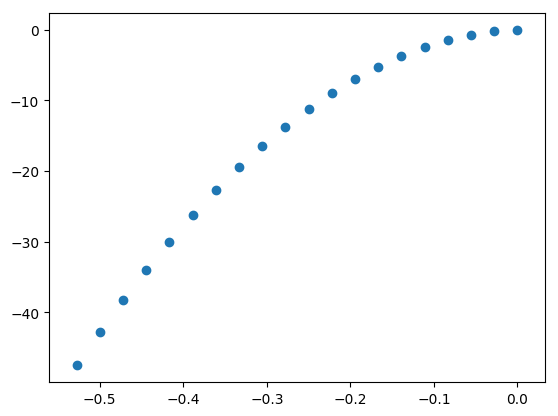

PyObject <matplotlib.collections.PathCollection object at 0x15b691fd0>

In [100]:
plt.scatter(positions_x, positions_y)